# Violations of the $v$-representability condition underlying Kohn-Sham density-functional theory
**Author**: Egor Trushin  
**Date created:** 26/01/2024  
**Last modified:** 22/07/2024  
**Description:** This notebook is for the analysis of data and the preparation of tables and figures for an upcoming article. This notebook can also be used as supplementary material.

In [1]:
import json
import pickle
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams["axes.unicode_minus"] = False

### EXX-OEP total energies from non-symmetrized, space-symmetrized, spin-symmetrized, and fully-symmetrized calculations

Total energies resulting from calculations that lead to non-Aufbau solutions are shown in bold.

In [2]:
with open('CLEAN_DATA/EXX_total_energies_all_sym_cases.json', 'r') as file_obj:
    exx_energies = json.load(file_obj)

def bold_text(text): return "\033[1m" + text + "\033[0m"

print("Atom    Non-Sym.    Space-Sym.     Spin-Sym.     Full-Sym.")
for system in exx_energies:
    e_nonsym = f"{exx_energies[system]['NonSym']:11.6f}"
    e_spacesym = f"{exx_energies[system]['SpaceSym']:11.6f}"
    e_spinsym = f"{exx_energies[system]['SpinSym']:11.6f}"
    if system in ["O", "F", "S", "Cl"]:
        e_spinsym = bold_text(e_spinsym)
    e_fullsym = f"{exx_energies[system]['FullSym']:11.6f}"
    print(f"{system:2}   {e_nonsym}   {e_spacesym}   {e_spinsym}   {e_fullsym}")

Atom    Non-Sym.    Space-Sym.     Spin-Sym.     Full-Sym.
B     -24.531363    -24.527885    -24.527595    -24.527347
C     -37.691836    -37.688661    -37.686554    -37.686327
N     -54.403208    -54.403208    -54.397950    -54.397950
O     -74.816730    -74.811545    -74.808660    -74.807403
F     -99.413727    -99.408770    -99.408278    -99.407436
Al   -241.877082   -241.873319   -241.873464   -241.873229
Si   -288.854178   -288.850027   -288.849692   -288.849501
P    -340.714135   -340.714135   -340.712837   -340.712837
S    -397.507365   -397.500464   -397.499841   -397.498967
Cl   -459.483425   -459.476559   -459.476703   -459.476057


### Occupation numbers and orbital energies for spin-symmetrized (i.e., spin-restricted) EXX-OEP calculations

In [3]:
with open('CLEAN_DATA/EXX_SpinSym_eigenvalues.json', 'r') as file_obj:
    exx_eigs = json.load(file_obj)

print(f'{" "*4} B {" "*12} C {" "*12} N {" "*12} O {" "*12} F')
for i in range(5):
    B = f'{exx_eigs["B"]["occ"][i]} {exx_eigs["B"]["eigenvalues"][i]:8.3f}'
    C = f'{exx_eigs["C"]["occ"][i]} {exx_eigs["C"]["eigenvalues"][i]:8.3f}'
    N = f'{exx_eigs["N"]["occ"][i]} {exx_eigs["N"]["eigenvalues"][i]:8.3f}'
    O = f'{exx_eigs["O"]["occ"][i]} {exx_eigs["O"]["eigenvalues"][i]:8.3f}'
    F = f'{exx_eigs["F"]["occ"][i]} {exx_eigs["F"]["eigenvalues"][i]:8.3f}'
    print(f"{B:14} {C:14} {N:14} {O:14} {F:14}")

print(f'\n{" "*4} Al {" "*11} Si {" "*11} P {" "*12} S {" "*12} Cl')
for i in range(9):
    Al = f'{exx_eigs["Al"]["occ"][i]} {exx_eigs["Al"]["eigenvalues"][i]:8.3f}'
    Si = f'{exx_eigs["Si"]["occ"][i]} {exx_eigs["Si"]["eigenvalues"][i]:8.3f}'
    P = f'{exx_eigs["P"]["occ"][i]} {exx_eigs["P"]["eigenvalues"][i]:8.3f}'
    S = f'{exx_eigs["S"]["occ"][i]} {exx_eigs["S"]["eigenvalues"][i]:8.3f}'
    Cl = f'{exx_eigs["Cl"]["occ"][i]} {exx_eigs["Cl"]["eigenvalues"][i]:8.3f}'
    print(f"{Al:14} {Si:14} {P:14} {S:14} {Cl:14}")

     B              C              N              O              F
2   -6.851     2  -10.297     2  -14.391     2  -19.179     2  -24.630    
2   -0.488     2   -0.705     2   -0.936     2   -1.150     2   -1.383    
1   -0.274     1   -0.389     1   -0.501     1   -0.596     1   -0.696    
0   -0.268     1   -0.389     1   -0.501     1   -0.596     2   -0.667    
0   -0.268     0   -0.380     1   -0.501     2   -0.568     2   -0.667    

     Al             Si             P              S              Cl
2  -55.549     2  -65.661     2  -76.573     2  -88.325     2 -100.930    
2   -4.163     2   -5.332     2   -6.600     2   -7.971     2   -9.462    
2   -2.736     2   -3.715     2   -4.784     2   -5.963     2   -7.260    
2   -2.736     2   -3.708     2   -4.784     2   -5.963     2   -7.243    
2   -2.731     2   -3.708     2   -4.784     2   -5.947     2   -7.243    
2   -0.382     2   -0.510     2   -0.650     2   -0.769     2   -0.902    
1   -0.204     1   -0.267     1   -0.34

### Occupation numbers and orbital energies from ROHF calculations

In [4]:
with open('CLEAN_DATA/ROHF_eigenvalues.json', 'r') as file_obj:
    rohf_eigs = json.load(file_obj)

print(f'{" "*4} B {" "*12} C {" "*12} N {" "*12} O {" "*12} F')
for i in range(5):
    B = f'{rohf_eigs["B"]["occ"][i]} {rohf_eigs["B"]["eigenvalues"][i]:8.3f}'
    C = f'{rohf_eigs["C"]["occ"][i]} {rohf_eigs["C"]["eigenvalues"][i]:8.3f}'
    N = f'{rohf_eigs["N"]["occ"][i]} {rohf_eigs["N"]["eigenvalues"][i]:8.3f}'
    O = f'{rohf_eigs["O"]["occ"][i]} {rohf_eigs["O"]["eigenvalues"][i]:8.3f}'
    F = f'{rohf_eigs["F"]["occ"][i]} {rohf_eigs["F"]["eigenvalues"][i]:8.3f}'
    print(f"{B:14} {C:14} {N:14} {O:14} {F:14}")

print(f'\n{" "*4} Al {" "*11} Si {" "*11} P {" "*12} S {" "*12} Cl')
for i in range(9):
    Al = f'{rohf_eigs["Al"]["occ"][i]} {rohf_eigs["Al"]["eigenvalues"][i]:8.3f}'
    Si = f'{rohf_eigs["Si"]["occ"][i]} {rohf_eigs["Si"]["eigenvalues"][i]:8.3f}'
    P = f'{rohf_eigs["P"]["occ"][i]} {rohf_eigs["P"]["eigenvalues"][i]:8.3f}'
    S = f'{rohf_eigs["S"]["occ"][i]} {rohf_eigs["S"]["eigenvalues"][i]:8.3f}'
    Cl = f'{rohf_eigs["Cl"]["occ"][i]} {rohf_eigs["Cl"]["eigenvalues"][i]:8.3f}'
    print(f"{Al:14} {Si:14} {P:14} {S:14} {Cl:14}")

     B              C              N              O              F
2   -7.695     2  -11.326     2  -15.629     2  -20.669     2  -26.383    
2   -0.495     2   -0.706     2   -0.945     2   -1.245     2   -1.573    
1   -0.310     1   -0.433     1   -0.568     1   -0.703     1   -0.834    
0    0.020     1   -0.433     1   -0.568     1   -0.703     2   -0.706    
0    0.020     0    0.011     1   -0.568     2   -0.567     2   -0.706    

     Al             Si             P              S              Cl
2  -58.501     2  -68.812     2  -79.970     2  -92.005     2 -104.884    
2   -4.911     2   -6.157     2   -7.511     2   -9.005     2  -10.608    
2   -3.219     2   -4.257     2   -5.401     2   -6.683     2   -8.074    
2   -3.219     2   -4.256     2   -5.401     2   -6.683     2   -8.072    
2   -3.218     2   -4.256     2   -5.401     2   -6.682     2   -8.072    
2   -0.393     2   -0.540     2   -0.696     2   -0.880     2   -1.073    
1   -0.210     1   -0.297     1   -0.39

### Occupation numbers and orbital energies from CAHF calculations

In [5]:
with open('CLEAN_DATA/CAHF_eigenvalues.json', 'r') as file_obj:
    cahf_eigs = json.load(file_obj)

print(f'{" "*4} B {" "*12} C {" "*12} N {" "*12} O {" "*12} F')
for i in range(5):
    B = f'{cahf_eigs["B"]["occ"][i]} {cahf_eigs["B"]["eigenvalues"][i]:8.3f}'
    C = f'{cahf_eigs["C"]["occ"][i]} {cahf_eigs["C"]["eigenvalues"][i]:8.3f}'
    N = f'{cahf_eigs["N"]["occ"][i]} {cahf_eigs["N"]["eigenvalues"][i]:8.3f}'
    O = f'{cahf_eigs["O"]["occ"][i]} {cahf_eigs["O"]["eigenvalues"][i]:8.3f}'
    F = f'{cahf_eigs["F"]["occ"][i]} {cahf_eigs["F"]["eigenvalues"][i]:8.3f}'
    print(f"{B:14} {C:14} {N:14} {O:14} {F:14}")

print(f'\n{" "*4} Al {" "*11} Si {" "*11} P {" "*12} S {" "*12} Cl')
for i in range(9):
    Al = f'{cahf_eigs["Al"]["occ"][i]} {cahf_eigs["Al"]["eigenvalues"][i]:8.3f}'
    Si = f'{cahf_eigs["Si"]["occ"][i]} {cahf_eigs["Si"]["eigenvalues"][i]:8.3f}'
    P = f'{cahf_eigs["P"]["occ"][i]} {cahf_eigs["P"]["eigenvalues"][i]:8.3f}'
    S = f'{cahf_eigs["S"]["occ"][i]} {cahf_eigs["S"]["eigenvalues"][i]:8.3f}'
    Cl = f'{cahf_eigs["Cl"]["occ"][i]} {cahf_eigs["Cl"]["eigenvalues"][i]:8.3f}'
    print(f"{Al:14} {Si:14} {P:14} {S:14} {Cl:14}")

     B              C              N              O              F
2   -7.737     2  -11.338     2  -15.666     2  -20.681     2  -26.383    
2   -0.408     2   -0.712     2   -0.964     2   -1.250     2   -1.573    
1   -0.221     1   -0.271     1   -0.509     2   -0.822     2   -1.217    
0   -0.221     1   -0.271     1   -0.509     1   -0.822     2   -1.217    
0   -0.221     0   -0.271     1   -0.509     1   -0.822     1   -1.217    

     Al             Si             P              S              Cl
2  -58.589     2  -68.819     2  -79.989     2  -92.011     2 -104.884    
2   -4.990     2   -6.163     2   -7.529     2   -9.010     2  -10.608    
2   -3.307     2   -4.262     2   -5.418     2   -6.688     2   -8.072    
2   -3.307     2   -4.262     2   -5.418     2   -6.688     2   -8.072    
2   -3.307     2   -4.262     2   -5.418     2   -6.688     2   -8.072    
2   -0.331     2   -0.544     2   -0.706     2   -0.883     2   -1.073    
1   -0.165     1   -0.186     1   -0.35

### Occupation numbers and orbital energies from KS inversion using RS2@CAHF, CISD@CAHF, and AQCC@CAHF target densities

In [6]:
with open('CLEAN_DATA/KSINV_CAHF_eigenvalues.json', 'r') as file_obj:
    ksinv_cahf_eigs = json.load(file_obj)

def bold_text(text): return "\033[1m" + text + "\033[0m"
    
for ref in ["RS2", "CISD", "AQCC"]:
    print(bold_text(f"\nUsing {ref} density\n"))

    print(f'{" "*4} B {" "*12} C {" "*12} N {" "*12} O {" "*12} F')
    for i in range(5):
        B = f'{ksinv_cahf_eigs["B"][ref]["occ"][i]} {ksinv_cahf_eigs["B"][ref]["eigenvalues"][i]:8.3f}'
        C = f'{ksinv_cahf_eigs["C"][ref]["occ"][i]} {ksinv_cahf_eigs["C"][ref]["eigenvalues"][i]:8.3f}'
        N = f'{ksinv_cahf_eigs["N"][ref]["occ"][i]} {ksinv_cahf_eigs["N"][ref]["eigenvalues"][i]:8.3f}'
        O = f'{ksinv_cahf_eigs["O"][ref]["occ"][i]} {ksinv_cahf_eigs["O"][ref]["eigenvalues"][i]:8.3f}'
        F = f'{ksinv_cahf_eigs["F"][ref]["occ"][i]} {ksinv_cahf_eigs["F"][ref]["eigenvalues"][i]:8.3f}'
        print(f"{B:14} {C:14} {N:14} {O:14} {F:14}")

    print(f'\n{" "*4} Al {" "*11} Si {" "*11} P {" "*12} S {" "*12} Cl')
    for i in range(9):
        if ksinv_cahf_eigs["Al"][ref]["eigenvalues"] is None:
            Al = " "*5+"-"
        else:
            Al = f'{ksinv_cahf_eigs["Al"][ref]["occ"][i]} {ksinv_cahf_eigs["Al"][ref]["eigenvalues"][i]:8.3f}'
        if ksinv_cahf_eigs["Si"][ref]["eigenvalues"] is None:
            Si = " "*5+"-"
        else:
            Si = f'{ksinv_cahf_eigs["Si"][ref]["occ"][i]} {ksinv_cahf_eigs["Si"][ref]["eigenvalues"][i]:8.3f}'
        P = f'{ksinv_cahf_eigs["P"][ref]["occ"][i]} {ksinv_cahf_eigs["P"][ref]["eigenvalues"][i]:8.3f}'
        S = f'{ksinv_cahf_eigs["S"][ref]["occ"][i]} {ksinv_cahf_eigs["S"][ref]["eigenvalues"][i]:8.3f}'
        Cl = f'{ksinv_cahf_eigs["Cl"][ref]["occ"][i]} {ksinv_cahf_eigs["Cl"][ref]["eigenvalues"][i]:8.3f}'
        print(f"{Al:14} {Si:14} {P:14} {S:14} {Cl:14}")


Using RS2 density

     B              C              N              O              F
2   -6.900     2  -10.299     2  -14.403     2  -19.186     2  -24.649    
2   -0.501     2   -0.709     2   -0.944     2   -1.152     2   -1.386    
0   -0.291     1   -0.392     1   -0.510     1   -0.600     1   -0.702    
0   -0.291     1   -0.392     1   -0.510     1   -0.600     2   -0.673    
1   -0.272     0   -0.389     1   -0.510     2   -0.573     2   -0.673    

     Al             Si             P              S              Cl
2  -55.537          -         2  -76.567     2  -88.316     2 -100.920    
2   -4.147          -         2   -6.593     2   -7.963     2   -9.454    
2   -2.723          -         2   -4.780     2   -5.958     2   -7.255    
2   -2.723          -         2   -4.780     2   -5.958     2   -7.237    
2   -2.716          -         2   -4.780     2   -5.942     2   -7.237    
2   -0.386          -         2   -0.651     2   -0.770     2   -0.901    
0   -0.207         

### HOMO-LUMO gap and EXX total energy and reference energy from KS inversion using RS2@CAHF, CISD@CAHF, and AQCC@CAHF target densities

In [7]:
with open('CLEAN_DATA/KSINV_CAHF_ref_en.json', 'r') as file_obj:
    ksinv_cahf_ref_en = json.load(file_obj)

with open('CLEAN_DATA/EXX_SpinSym_gaps.json', 'r') as file_obj:
    exx_gaps = json.load(file_obj)
    
with open('CLEAN_DATA/KSINV_CAHF_gaps.json', 'r') as file_obj:
    ksinv_cahf_gaps = json.load(file_obj)
    
print(f'{" "*14} B {" "*18} C {" "*19} O {" "*18} F')
for ref in ["EXX", "RS2", "CISD", "AQCC"]:
    if ref == "EXX":
        B_gap = exx_gaps["B"]["a"]
        B = f'{B_gap:8.5f} {exx_energies["B"]["NonSym"]:8.5f}'
        C_gap = exx_gaps["C"]["a"]
        C = f'{C_gap:8.5f} {exx_energies["C"]["NonSym"]:8.5f}'
        O_gap = exx_gaps["O"]["b"]
        O = f'{O_gap:8.5f} {exx_energies["O"]["NonSym"]:8.5f}'
        F_gap = exx_gaps["F"]["b"]
        F = f'{F_gap:8.5f} {exx_energies["F"]["NonSym"]:8.5f}'
    else:
        B_gap = ksinv_cahf_gaps["B"][ref]["a"]
        B = f'{B_gap:8.5f} {ksinv_cahf_ref_en["B"][ref]:8.5f}'
        C_gap = ksinv_cahf_gaps["C"][ref]["a"]
        C = f'{C_gap:8.5f} {ksinv_cahf_ref_en["C"][ref]:8.5f}'
        O_gap = ksinv_cahf_gaps["O"][ref]["b"]
        O = f'{O_gap:8.5f} {ksinv_cahf_ref_en["O"][ref]:8.5f}'
        F_gap = ksinv_cahf_gaps["F"][ref]["b"]
        F = f'{F_gap:8.5f} {ksinv_cahf_ref_en["F"][ref]:8.5f}'
    print(f"{ref:6} {B:20} {C:20} {O:20} {F:20}")

print(f'\n{" "*14} Al {" "*18} Si {" "*19} S {" "*18} Cl')
for ref in ["EXX", "RS2", "CISD", "AQCC"]:
    if ref == "EXX":
        Al_gap = exx_gaps["Al"]["a"]
        Al = f'{Al_gap:8.5f} {exx_energies["Al"]["NonSym"]:8.5f}'
        Si_gap = exx_gaps["Si"]["a"]
        Si = f'{Si_gap:8.5f} {exx_energies["Si"]["NonSym"]:8.5f}'
        S_gap = exx_gaps["S"]["b"]
        S = f'{S_gap:8.5f} {exx_energies["S"]["NonSym"]:8.5f}'
        Cl_gap = exx_gaps["Cl"]["b"]
        Cl = f'{Cl_gap:8.5f} {exx_energies["Cl"]["NonSym"]:8.5f}'
    else:
        Al_gap = ksinv_cahf_gaps["Al"][ref]["a"]
        Al = f'{Al_gap:8.5f} {ksinv_cahf_ref_en["Al"][ref]:8.5f}'
        Si_gap = ksinv_cahf_gaps["Si"][ref]["a"]
        if Si_gap is not None:
            Si = f'{Si_gap:8.5f} {ksinv_cahf_ref_en["Si"][ref]:8.5f}'
        else:
            Si = ""
        S_gap = ksinv_cahf_gaps["S"][ref]["b"]
        S = f'{O_gap:8.5f} {ksinv_cahf_ref_en["S"][ref]:8.5f}'
        Cl_gap = ksinv_cahf_gaps["Cl"][ref]["b"]
        Cl = f'{Cl_gap:8.5f} {ksinv_cahf_ref_en["Cl"][ref]:8.5f}'
    print(f"{ref:6} {Al:20} {Si:20} {S:20} {Cl:20}")

               B                    C                     O                    F
EXX     0.00594 -24.53136    0.00868 -37.69184   -0.02843 -74.81673   -0.02877 -99.41373  
RS2    -0.01871 -24.64566    0.00251 -37.82847   -0.02681 -75.05395   -0.02853 -99.71810  
CISD   -0.01682 -24.65032   -0.01747 -37.83619   -0.03156 -75.05124   -0.03456 -99.71304  
AQCC   -0.01701 -24.65116   -0.01823 -37.83835   -0.03569 -75.05666   -0.03870 -99.71990  

               Al                    Si                     S                    Cl
EXX     0.00286 -241.87708   0.00308 -288.85418  -0.01227 -397.50737  -0.01223 -459.48342 
RS2    -0.00729 -242.31034                       -0.03569 -398.06517  -0.01477 -460.09718 
CISD   -0.00531 -242.30016  -0.00397 -289.30120  -0.03569 -398.03897  -0.01623 -460.07070 
AQCC   -0.00609 -242.31268  -0.00678 -289.31887  -0.03569 -398.06667  -0.02397 -460.10289 


### Exhange potential from spin-symmetrized EXX calculations and exchange-correlation ponentials from KS inversion using RS2@CAHF, CISD@CAHF, and AQCC@CAHF target densities

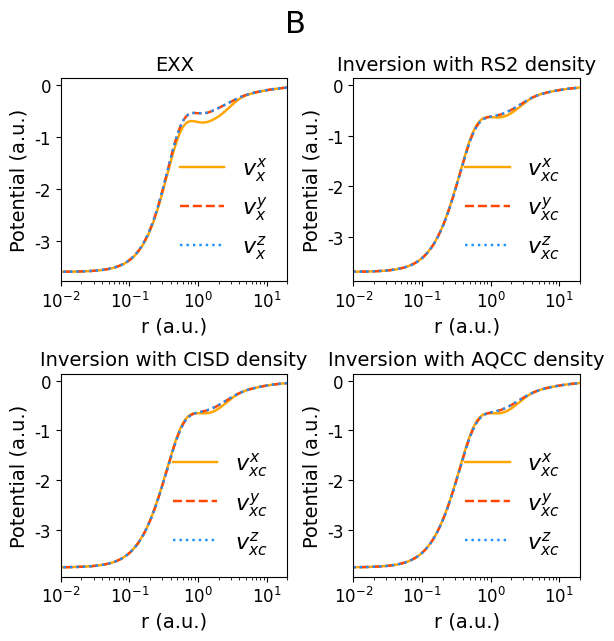

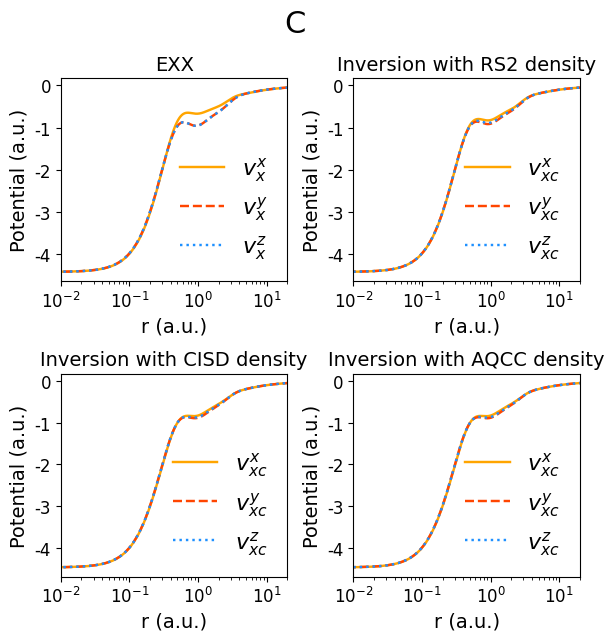

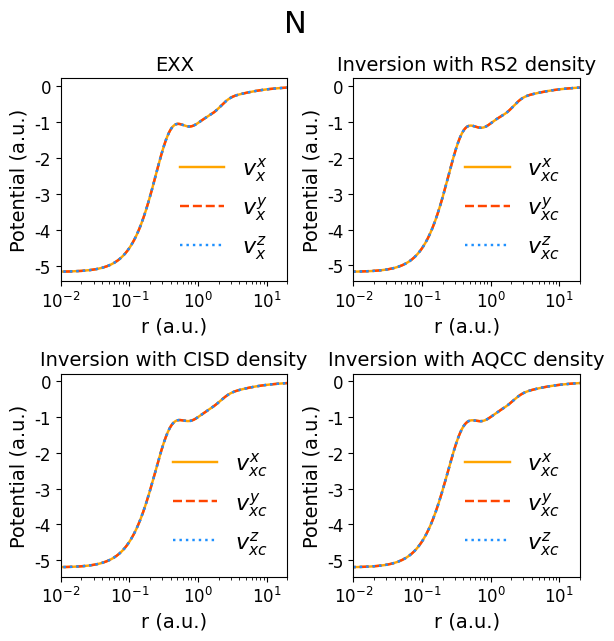

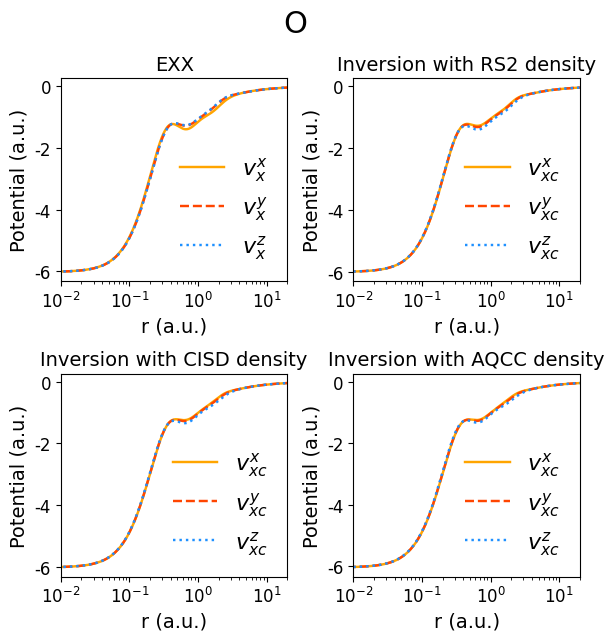

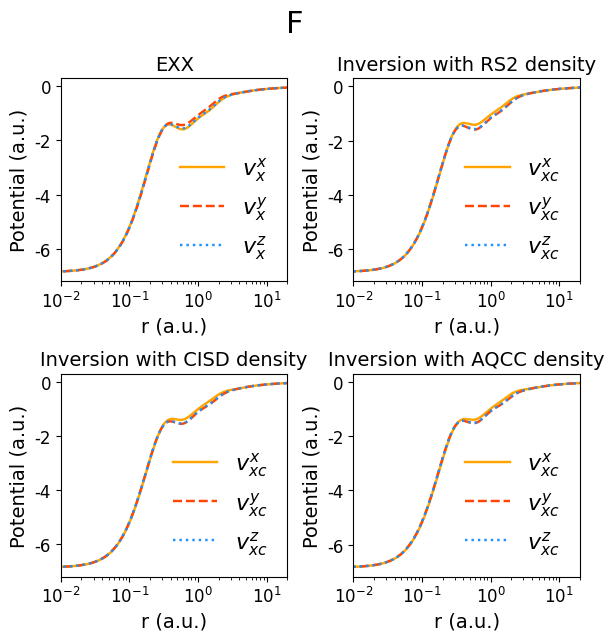

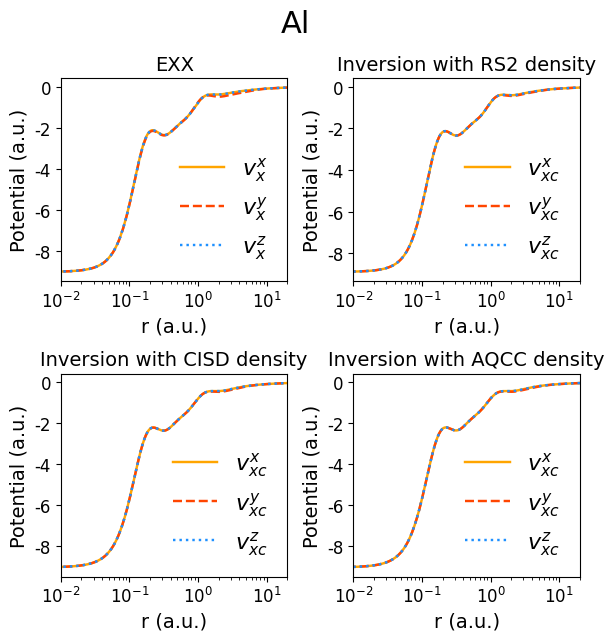

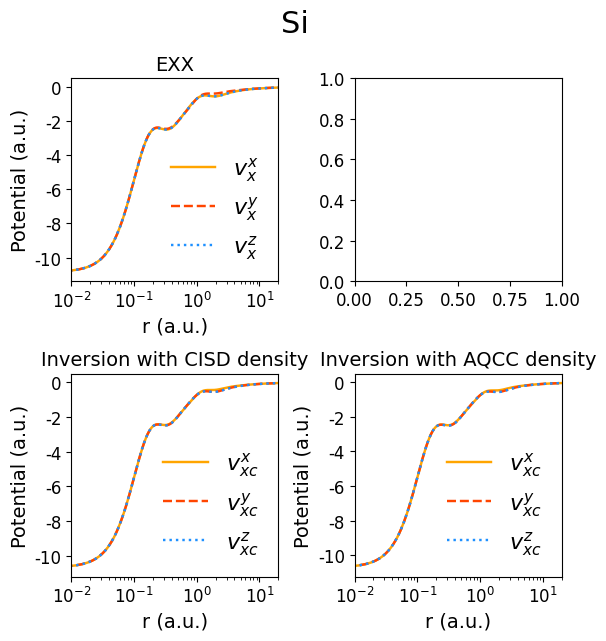

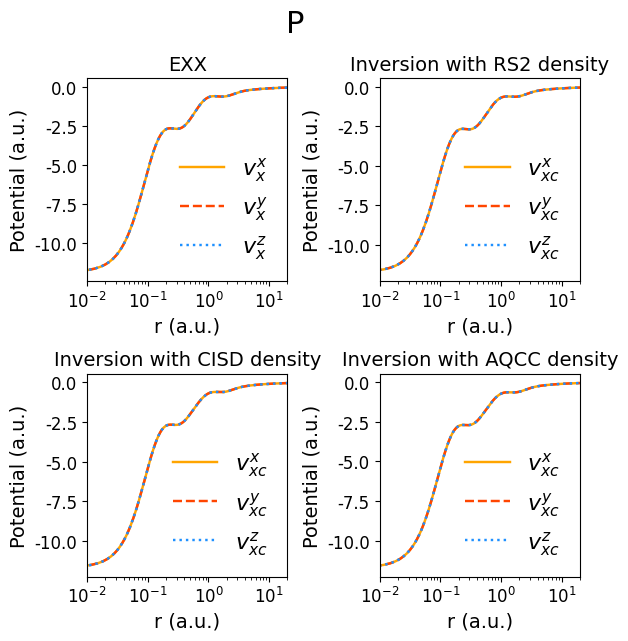

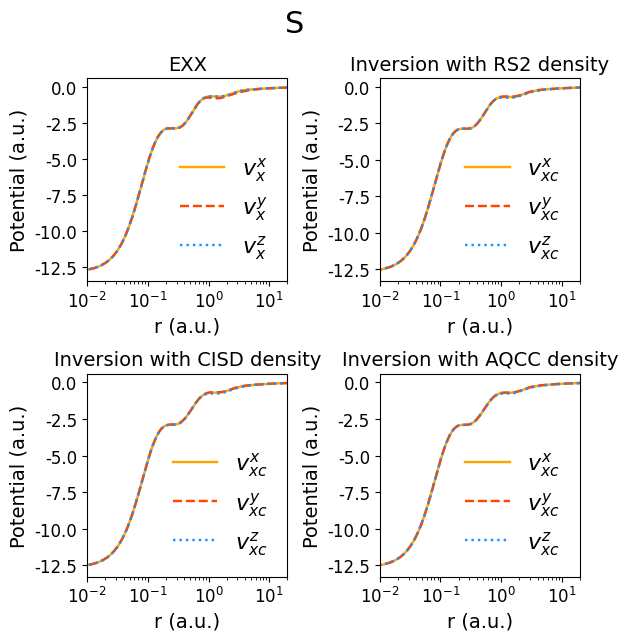

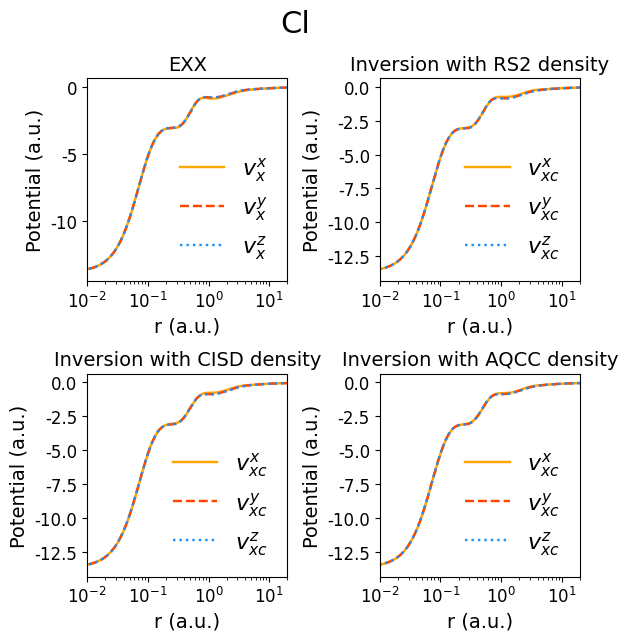

In [8]:
with open('CLEAN_DATA/EXX_SpinSym_vx.pkl', 'rb') as file_obj:
    vx = pickle.load(file_obj)
    
with open('CLEAN_DATA/KSINV_CAHF_vxc.pkl', 'rb') as file_obj:
    vxc = pickle.load(file_obj)

for s in vx:

    # Plot exchange potentials
    fig, axs = plt.subplots(2, 2, figsize=(6,6.5))
    plt.suptitle(f"{s}", size=22)
    
    i = 0
    axs.flatten()[i].set_title("EXX", fontsize=14)
    axs.flatten()[i].set_ylabel('Potential (a.u.)', fontsize=14)
    axs.flatten()[i].set_xlabel('r (a.u.)', fontsize=14)
    axs.flatten()[i].set_xlim(0.01, 20.0)
    axs.flatten()[i].set_xscale("log")
    coord = vx[s]["x"][0]
    pot = vx[s]["x"][1]
    axs.flatten()[i].plot(coord, pot, '-', color="orange", label=r'$v_{x}^x$')
    coord = vx[s]["y"][0]
    pot = vx[s]["y"][1]
    axs.flatten()[i].plot(coord, pot, '--', color="orangered", label=r'$v_{x}^y$')
    coord = vx[s]["z"][0]
    pot = vx[s]["z"][1]
    axs.flatten()[i].plot(coord, pot, ':', color="dodgerblue", label=r'$v_{x}^z$')
    axs.flatten()[i].legend(frameon=False, fontsize=16, loc=4)

    i = 1
    if s not in ["Si"]:
        axs.flatten()[i].set_title("Inversion with RS2 density", fontsize=14)
        axs.flatten()[i].set_ylabel('Potential (a.u.)', fontsize=14)
        axs.flatten()[i].set_xlabel('r (a.u.)', fontsize=14)
        axs.flatten()[i].set_xlim(0.01, 20.0)
        axs.flatten()[i].set_xscale("log")
        coord = vxc[s]["RS2"]["x"][0]
        pot = vxc[s]["RS2"]["x"][1]
        axs.flatten()[i].plot(coord, pot, '-', color="orange", label=r'$v_{xc}^x$')
        coord = vxc[s]["RS2"]["y"][0]
        pot = vxc[s]["RS2"]["y"][1]
        axs.flatten()[i].plot(coord, pot, '--', color="orangered", label=r'$v_{xc}^y$')
        coord = vxc[s]["RS2"]["z"][0]
        pot = vxc[s]["RS2"]["z"][1]
        axs.flatten()[i].plot(coord, pot, ':', color="dodgerblue", label=r'$v_{xc}^z$')
        axs.flatten()[i].legend(frameon=False, fontsize=16, loc=4)

    i = 2
    axs.flatten()[i].set_title("Inversion with CISD density", fontsize=14)
    axs.flatten()[i].set_ylabel('Potential (a.u.)', fontsize=14)
    axs.flatten()[i].set_xlabel('r (a.u.)', fontsize=14)
    axs.flatten()[i].set_xlim(0.01, 20.0)
    axs.flatten()[i].set_xscale("log")
    coord = vxc[s]["CISD"]["x"][0]
    pot = vxc[s]["CISD"]["x"][1]
    axs.flatten()[i].plot(coord, pot, '-', color="orange", label=r'$v_{xc}^x$')
    coord = vxc[s]["CISD"]["y"][0]
    pot = vxc[s]["CISD"]["y"][1]
    axs.flatten()[i].plot(coord, pot, '--', color="orangered", label=r'$v_{xc}^y$')
    coord = vxc[s]["CISD"]["z"][0]
    pot = vxc[s]["CISD"]["z"][1]
    axs.flatten()[i].plot(coord, pot, ':', color="dodgerblue", label=r'$v_{xc}^z$')
    axs.flatten()[i].legend(frameon=False, fontsize=16, loc=4)

    i = 3
    axs.flatten()[i].set_title("Inversion with AQCC density", fontsize=14)
    axs.flatten()[i].set_ylabel('Potential (a.u.)', fontsize=14)
    axs.flatten()[i].set_xlabel('r (a.u.)', fontsize=14)
    axs.flatten()[i].set_xlim(0.01, 20.0)
    axs.flatten()[i].set_xscale("log")
    coord = vxc[s]["AQCC"]["x"][0]
    pot = vxc[s]["AQCC"]["x"][1]
    axs.flatten()[i].plot(coord, pot, '-', color="orange", label=r'$v_{xc}^x$')
    coord = vxc[s]["AQCC"]["y"][0]
    pot = vxc[s]["AQCC"]["y"][1]
    axs.flatten()[i].plot(coord, pot, '--', color="orangered", label=r'$v_{xc}^y$')
    coord = vxc[s]["AQCC"]["z"][0]
    pot = vxc[s]["AQCC"]["z"][1]
    axs.flatten()[i].plot(coord, pot, ':', color="dodgerblue", label=r'$v_{xc}^z$')
    axs.flatten()[i].legend(frameon=False, fontsize=16, loc=4)
    
    plt.tight_layout()

    plt.savefig(f'{s}.eps', format='eps')
    
    plt.show()

### Occupation numbers and orbital energies from KS inversion using RS2@ROHF, CISD@ROHF, and AQCC@ROHF target densities

In [9]:
with open('CLEAN_DATA/KSINV_ROHF_eigenvalues.json', 'r') as file_obj:
    ksinv_rohf_eigs = json.load(file_obj)

def bold_text(text): return "\033[1m" + text + "\033[0m"

for ref in ["RS2", "CISD", "AQCC"]:
    print(bold_text(f"\nUsing {ref} density\n"))

    print(f'{" "*4} B {" "*12} C {" "*12} N {" "*12} O {" "*12} F')
    for i in range(5):
        B = f'{ksinv_rohf_eigs["B"][ref]["occ"][i]} {ksinv_rohf_eigs["B"][ref]["eigenvalues"][i]:8.3f}'
        C = f'{ksinv_rohf_eigs["C"][ref]["occ"][i]} {ksinv_rohf_eigs["C"][ref]["eigenvalues"][i]:8.3f}'
        N = f'{ksinv_rohf_eigs["N"][ref]["occ"][i]} {ksinv_rohf_eigs["N"][ref]["eigenvalues"][i]:8.3f}'
        O = f'{ksinv_rohf_eigs["O"][ref]["occ"][i]} {ksinv_rohf_eigs["O"][ref]["eigenvalues"][i]:8.3f}'
        F = f'{ksinv_rohf_eigs["F"][ref]["occ"][i]} {ksinv_rohf_eigs["F"][ref]["eigenvalues"][i]:8.3f}'
        print(f"{B:14} {C:14} {N:14} {O:14} {F:14}")

    print(f'\n{" "*4} Al {" "*11} Si {" "*11} P {" "*12} S {" "*12} Cl')
    for i in range(9):
        if ksinv_rohf_eigs["Al"][ref]["eigenvalues"] is None:
            Al = " "*5+"-"
        else:
            Al = f'{ksinv_rohf_eigs["Al"][ref]["occ"][i]} {ksinv_rohf_eigs["Al"][ref]["eigenvalues"][i]:8.3f}'
        if ksinv_rohf_eigs["Si"][ref]["eigenvalues"] is None:
            Si = " "*5+"-"
        else:
            Si = f'{ksinv_rohf_eigs["Si"][ref]["occ"][i]} {ksinv_rohf_eigs["Si"][ref]["eigenvalues"][i]:8.3f}'
        P = f'{ksinv_rohf_eigs["P"][ref]["occ"][i]} {ksinv_rohf_eigs["P"][ref]["eigenvalues"][i]:8.3f}'
        S = f'{ksinv_rohf_eigs["S"][ref]["occ"][i]} {ksinv_rohf_eigs["S"][ref]["eigenvalues"][i]:8.3f}'
        Cl = f'{ksinv_rohf_eigs["Cl"][ref]["occ"][i]} {ksinv_rohf_eigs["Cl"][ref]["eigenvalues"][i]:8.3f}'
        print(f"{Al:14} {Si:14} {P:14} {S:14} {Cl:14}")


Using RS2 density

     B              C              N              O              F
2   -6.853     2  -10.299     2  -14.400     2  -19.185     2  -24.640    
2   -0.488     2   -0.707     2   -0.943     2   -1.146     2   -1.375    
1   -0.273     1   -0.391     1   -0.509     1   -0.596     1   -0.694    
0   -0.270     1   -0.391     1   -0.509     1   -0.596     2   -0.661    
0   -0.270     0   -0.386     1   -0.509     2   -0.564     2   -0.661    

     Al             Si             P              S              Cl
2  -55.541          -         2  -76.566     2  -88.315     2 -100.920    
2   -4.146          -         2   -6.592     2   -7.963     2   -9.454    
2   -2.722          -         2   -4.779     2   -5.958     2   -7.256    
2   -2.722          -         2   -4.779     2   -5.958     2   -7.235    
2   -2.716          -         2   -4.779     2   -5.940     2   -7.235    
2   -0.383          -         2   -0.652     2   -0.769     2   -0.900    
1   -0.204         

### HOMO-LUMO gap and EXX total energy and reference energy from KS inversion using RS2@ROHF, CISD@ROHF, and AQCC@ROHF target densities

In [10]:
with open('CLEAN_DATA/KSINV_ROHF_ref_en.json', 'r') as file_obj:
    ksinv_rohf_ref_en = json.load(file_obj)

with open('CLEAN_DATA/EXX_SpinSym_gaps.json', 'r') as file_obj:
    exx_gaps = json.load(file_obj)
    
with open('CLEAN_DATA/KSINV_ROHF_gaps.json', 'r') as file_obj:
    ksinv_rohf_gaps = json.load(file_obj)
    
print(f'{" "*14} B {" "*18} C {" "*19} O {" "*18} F')
for ref in ["EXX", "RS2", "CISD", "AQCC"]:
    if ref == "EXX":
        B_gap = exx_gaps["B"]["a"]
        B = f'{B_gap:8.5f} {exx_energies["B"]["NonSym"]:8.5f}'
        C_gap = exx_gaps["C"]["a"]
        C = f'{C_gap:8.5f} {exx_energies["C"]["NonSym"]:8.5f}'
        O_gap = exx_gaps["O"]["b"]
        O = f'{O_gap:8.5f} {exx_energies["O"]["NonSym"]:8.5f}'
        F_gap = exx_gaps["F"]["b"]
        F = f'{F_gap:8.5f} {exx_energies["F"]["NonSym"]:8.5f}'
    else:
        B_gap = ksinv_rohf_gaps["B"][ref]["a"]
        B = f'{B_gap:8.5f} {ksinv_rohf_ref_en["B"][ref]:8.5f}'
        C_gap = ksinv_rohf_gaps["C"][ref]["a"]
        C = f'{C_gap:8.5f} {ksinv_rohf_ref_en["C"][ref]:8.5f}'
        O_gap = ksinv_rohf_gaps["O"][ref]["b"]
        O = f'{O_gap:8.5f} {ksinv_rohf_ref_en["O"][ref]:8.5f}'
        F_gap = ksinv_rohf_gaps["F"][ref]["b"]
        F = f'{F_gap:8.5f} {ksinv_rohf_ref_en["F"][ref]:8.5f}'
    print(f"{ref:6} {B:20} {C:20} {O:20} {F:20}")

print(f'\n{" "*14} Al {" "*18} Si {" "*19} S {" "*18} Cl')
for ref in ["EXX", "RS2", "CISD", "AQCC"]:
    if ref == "EXX":
        Al_gap = exx_gaps["Al"]["a"]
        Al = f'{Al_gap:8.5f} {exx_energies["Al"]["NonSym"]:8.5f}'
        Si_gap = exx_gaps["Si"]["a"]
        Si = f'{Si_gap:8.5f} {exx_energies["Si"]["NonSym"]:8.5f}'
        S_gap = exx_gaps["S"]["b"]
        S = f'{S_gap:8.5f} {exx_energies["S"]["NonSym"]:8.5f}'
        Cl_gap = exx_gaps["Cl"]["b"]
        Cl = f'{Cl_gap:8.5f} {exx_energies["Cl"]["NonSym"]:8.5f}'
    else:
        Al_gap = ksinv_rohf_gaps["Al"][ref]["a"]
        if Al_gap is not None:
            Al = f'{Al_gap:8.5f} {ksinv_rohf_ref_en["Al"][ref]:8.5f}'
        else:
            Al = ""
        Si_gap = ksinv_rohf_gaps["Si"][ref]["a"]
        if Si_gap is not None:
            Si = f'{Si_gap:8.5f} {ksinv_rohf_ref_en["Si"][ref]:8.5f}'
        else:
            Si = ""
        S_gap = ksinv_rohf_gaps["S"][ref]["b"]
        S = f'{O_gap:8.5f} {ksinv_rohf_ref_en["S"][ref]:8.5f}'
        Cl_gap = ksinv_rohf_gaps["Cl"][ref]["b"]
        Cl = f'{Cl_gap:8.5f} {ksinv_rohf_ref_en["Cl"][ref]:8.5f}'
    print(f"{ref:6} {Al:20} {Si:20} {S:20} {Cl:20}")

               B                    C                     O                    F
EXX     0.00594 -24.53136    0.00868 -37.69184   -0.02843 -74.81673   -0.02877 -99.41373  
RS2     0.00278 -24.63325    0.00420 -37.82818   -0.03169 -75.05448   -0.03238 -99.71868  
CISD   -0.01345 -24.64675   -0.01692 -37.83611   -0.03575 -75.05176   -0.03836 -99.71331  
AQCC   -0.01601 -24.64906   -0.02071 -37.83912   -0.03669 -75.05680   -0.03945 -99.71992  

               Al                    Si                     S                    Cl
EXX     0.00286 -241.87708   0.00308 -288.85418  -0.01227 -397.50737  -0.01223 -459.48342 
RS2     0.00165 -242.30350                       -0.03669 -398.06581  -0.01644 -460.09761 
CISD                        -0.00263 -289.30133  -0.03669 -398.03972  -0.01965 -460.07113 
AQCC   -0.00446 -242.31005  -0.00954 -289.32096  -0.03669 -398.06668  -0.02443 -460.10283 


### Density errors of KS inversion usign RS2@CAHF, CISD@CAHF, and AQCC@CAHF target densities
The density error is defined as $N_{err} = \frac{1}{N_e}\int|\rho_\text{KS}(\mathbf{r})-\rho_\text{Ref}(\mathbf{r})|d\mathbf{r}$, where $N_e$ is the number of electrons.

In [11]:
with open('CLEAN_DATA/KSINV_CAHF_density_errors.json', 'r') as file_obj:
    density_error = json.load(file_obj)

print("Atom"+" "*3+"RS2"+" "*8+"CISD"+" "*8+"AQCC")
for system in density_error:
    if density_error[system]['RS2'] is None:
        RS2 = ""
    else:
        RS2 = f"{density_error[system]['RS2']:.1e}"
    CISD = f"{density_error[system]['CISD']:.1e}"
    AQCC = f"{density_error[system]['AQCC']:.1e}"
    print(f"{system:4} {RS2:11} {CISD:11} {AQCC:11}")

Atom   RS2        CISD        AQCC
B    4.4e-03     3.6e-03     3.6e-03    
C    1.6e-03     2.0e-03     2.1e-03    
N    1.9e-03     1.0e-03     1.1e-03    
O    1.7e-03     1.4e-03     1.8e-03    
F    1.1e-03     9.2e-04     1.0e-03    
Al   9.6e-04     1.1e-03     1.0e-03    
Si               2.2e-03     2.2e-03    
P    2.8e-03     2.2e-03     2.2e-03    
S    2.5e-03     2.2e-03     2.1e-03    
Cl   1.8e-03     1.6e-03     1.6e-03    


### Density errors: Oxygen atom versus Nitrogen atom

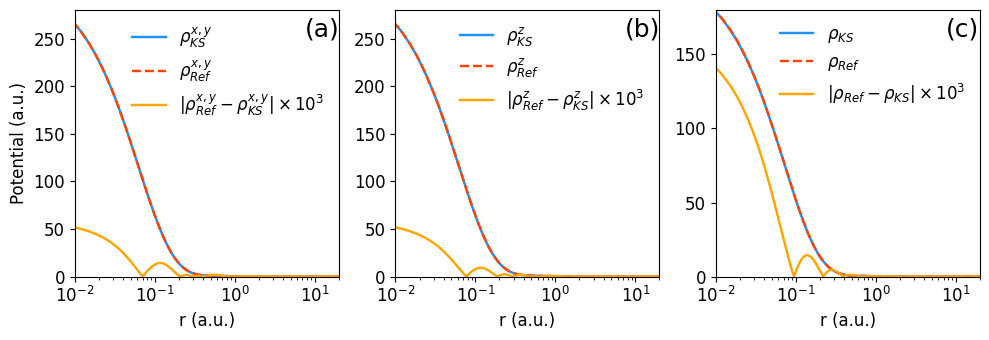

In [17]:
with open('CLEAN_DATA/KSINV_CAHF_rho.pkl', 'rb') as file_obj:
    densities = pickle.load(file_obj)

fig, axs = plt.subplots(1, 3, figsize=(10,3.5))

axs[0].set_xlim(0.01, 20.0)
axs[0].set_ylim(0.0, 280)
axs[0].set_xscale("log")

axs[1].set_xlim(0.01, 20.0)
axs[1].set_ylim(0.0, 280)
axs[1].set_xscale("log")

axs[2].set_xlim(0.01, 20.0)
axs[2].set_ylim(0.0, 180)
axs[2].set_xscale("log")

axs[0].set_xlabel('r (a.u.)', fontsize=12)
axs[1].set_xlabel('r (a.u.)', fontsize=12)
axs[2].set_xlabel('r (a.u.)', fontsize=12)
axs[0].set_ylabel('Potential (a.u.)', fontsize=12)

coord = np.array(densities["O"]["AQCC"]["ks_x"][0])
rhoks = np.array(densities["O"]["AQCC"]["ks_x"][1])
rhoref = np.array(densities["O"]["AQCC"]["ref_x"][1])
axs[0].plot(coord, rhoks, '-', color="dodgerblue", label=r'$\rho_{KS}^{x,y}$')
axs[0].plot(coord, rhoref, '--', color="orangered", label=r'$\rho_{Ref}^{x,y}$')
axs[0].plot(coord, abs(rhoks-rhoref)*1000, '-', color="orange", label=r'$|\rho_{Ref}^{x,y}-\rho_{KS}^{x,y}| \times 10^3$')
axs[0].legend(frameon=False, fontsize=12, loc=1)

coord = np.array(densities["O"]["AQCC"]["ks_y"][0])
rhoks = np.array(densities["O"]["AQCC"]["ks_y"][1])
rhoref = np.array(densities["O"]["AQCC"]["ref_y"][1])
axs[1].plot(coord, rhoks, '-', color="dodgerblue", label=r'$\rho_{KS}^z$')
axs[1].plot(coord, rhoref, '--', color="orangered", label=r'$\rho_{Ref}^z$')
axs[1].plot(coord, abs(rhoks-rhoref)*1000, '-', color="orange", label=r'$|\rho_{Ref}^z-\rho_{KS}^z| \times 10^3$')
axs[1].legend(frameon=False, fontsize=12, loc=1)

coord = np.array(densities["N"]["AQCC"]["ks_x"][0])
rhoks = np.array(densities["N"]["AQCC"]["ks_x"][1])
rhoref = np.array(densities["N"]["AQCC"]["ref_x"][1])
axs[2].plot(coord, rhoks, '-', color="dodgerblue", label=r'$\rho_{KS}$')
axs[2].plot(coord, rhoref, '--', color="orangered", label=r'$\rho_{Ref}$')
axs[2].plot(coord, abs(rhoks-rhoref)*1000, '-', color="orange", label=r'$|\rho_{Ref}-\rho_{KS}| \times 10^3$')
axs[2].legend(frameon=False, fontsize=12, loc=1)

plt.tight_layout()
plt.text(0.87, 0.9, "(a)", fontsize=18, weight="medium", transform=axs[0].transAxes)
plt.text(0.87, 0.9, "(b)", fontsize=18, weight="medium", transform=axs[1].transAxes)
plt.text(0.87, 0.9, "(c)", fontsize=18, weight="medium", transform=axs[2].transAxes)
plt.savefig('density_diff_O_N.eps', format='eps')
plt.show()

### Occupation numbers and orbital energies from inversion using FCI target density

In [13]:
with open('CLEAN_DATA/KSINV_FCI_eigenvalues.json', 'r') as file_obj:
    ksinv_fci_eigs = json.load(file_obj)

print(f'B aug-cc-pwCVTZ {" "*4} B aug-cc-pwCVQZ {" "*4} C aug-cc-pwCVTZ')
for i in range(5):
    BT = f'{ksinv_fci_eigs["B_aug-cc-pwCVTZ"]["occ"][i]} {ksinv_fci_eigs["B_aug-cc-pwCVTZ"]["eigenvalues"][i]:8.3f}'
    BQ = f'{ksinv_fci_eigs["B_aug-cc-pwCVQZ"]["occ"][i]} {ksinv_fci_eigs["B_aug-cc-pwCVQZ"]["eigenvalues"][i]:8.3f}'
    CT = f'{ksinv_fci_eigs["C_aug-cc-pwCVTZ"]["occ"][i]} {ksinv_fci_eigs["C_aug-cc-pwCVTZ"]["eigenvalues"][i]:8.3f}'
    print(f"  {BT:20} {BQ:20} {CT:20}")

B aug-cc-pwCVTZ      B aug-cc-pwCVQZ      C aug-cc-pwCVTZ
  2   -6.876           2   -6.909           2  -10.311          
  2   -0.456           2   -0.500           2   -0.687          
  0   -0.252           0   -0.289           0   -0.386          
  0   -0.252           0   -0.289           1   -0.363          
  1   -0.246           1   -0.272           1   -0.363          


### HOMO-LUMO gap and reference energy from KS inversion using FCI target densities versus other approaches

In [14]:
with open('CLEAN_DATA/KSINV_FCI_Suppl.json', 'r') as file_obj:
    ksinv_fci_suppl = json.load(file_obj)

print(f'{" "*8} B aug-cc-pwCVTZ {" "*4} B aug-cc-pwCVQZ {" "*4} C aug-cc-pwCVTZ')
for mtd in ["EXX", "RS2", "CISD", "AQCC", "FCI"]:
    if mtd == "FCI":
        BT_gap = ksinv_fci_eigs["B_aug-cc-pwCVTZ"]["gaps"]["a"]
        BT_en = -24.643560383378
        BQ_gap = ksinv_fci_eigs["B_aug-cc-pwCVQZ"]["gaps"]["a"]
        BQ_en = -24.650436376258
        CT_gap = ksinv_fci_eigs["C_aug-cc-pwCVTZ"]["gaps"]["a"]
        CT_en = -37.830870054720
        print(f"{mtd:4}   {BT_gap:8.5f} {BT_en:8.5f}   {BQ_gap:8.5f} {BQ_en:8.5f}   {CT_gap:8.5f} {CT_en:8.5f}")
    else:
        BT_gap = ksinv_fci_suppl["B_aug-cc-pwCVTZ"][mtd]["gaps"]["a"]
        BT_en = ksinv_fci_suppl["B_aug-cc-pwCVTZ"][mtd]["en"]
        BQ_gap = ksinv_fci_suppl["B_aug-cc-pwCVQZ"][mtd]["gaps"]["a"]
        BQ_en = ksinv_fci_suppl["B_aug-cc-pwCVQZ"][mtd]["en"]
        CT_gap = ksinv_fci_suppl["C_aug-cc-pwCVTZ"][mtd]["gaps"]["a"]
        CT_en = ksinv_fci_suppl["C_aug-cc-pwCVTZ"][mtd]["en"]
        print(f"{mtd:4}   {BT_gap:8.5f} {BT_en:8.5f}   {BQ_gap:8.5f} {BQ_en:8.5f}   {CT_gap:8.5f} {CT_en:8.5f}")

         B aug-cc-pwCVTZ      B aug-cc-pwCVQZ      C aug-cc-pwCVTZ
EXX     0.01339 -24.52360    0.00630 -24.52747    0.00699 -37.68471
RS2    -0.00795 -24.63516   -0.01833 -24.64314    0.00258 -37.81408
CISD   -0.00724 -24.64175   -0.01679 -24.64845   -0.01944 -37.82478
AQCC   -0.00734 -24.64253   -0.01695 -24.64928   -0.01999 -37.82684
FCI    -0.00691 -24.64356   -0.01648 -24.65044   -0.02285 -37.83087
